In [1]:
import pandas as pd 
import numpy
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler

In [2]:
maybank = pd.read_csv("petronas (1).csv")
maybank

,date,revenue,net_profit,total_liabilities,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,30/9/2019,319.5,134.5,"1,383.40",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30/12/2019,335.3,140.3,"1,470.50",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30/3/2020,323.5,141.3,"1,424.10",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30/6/2020,326.5,157.4,"1,423.20",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30/9/2020,338.7,177.1,"1,439.60",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,30/12/2020,345.2,158.2,"1,336.50",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30/3/2021,323.4,171.9,"1,268.50",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,30/6/2021,333.2,144.4,"1,320.40",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,30/9/2021,341.3,189.5,"1,347.70",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,30/12/2021,359.3,147.6,"1,403.30",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
maybank = maybank[['date', 'revenue', 'net_profit', 'total_liabilities']]
maybank = maybank.dropna()

In [4]:
maybank_rev = maybank[['date','revenue']]
maybank_rev

,date,revenue
0,30/9/2019,319.5
1,30/12/2019,335.3
2,30/3/2020,323.5
3,30/6/2020,326.5
4,30/9/2020,338.7
5,30/12/2020,345.2
6,30/3/2021,323.4
7,30/6/2021,333.2
8,30/9/2021,341.3
9,30/12/2021,359.3


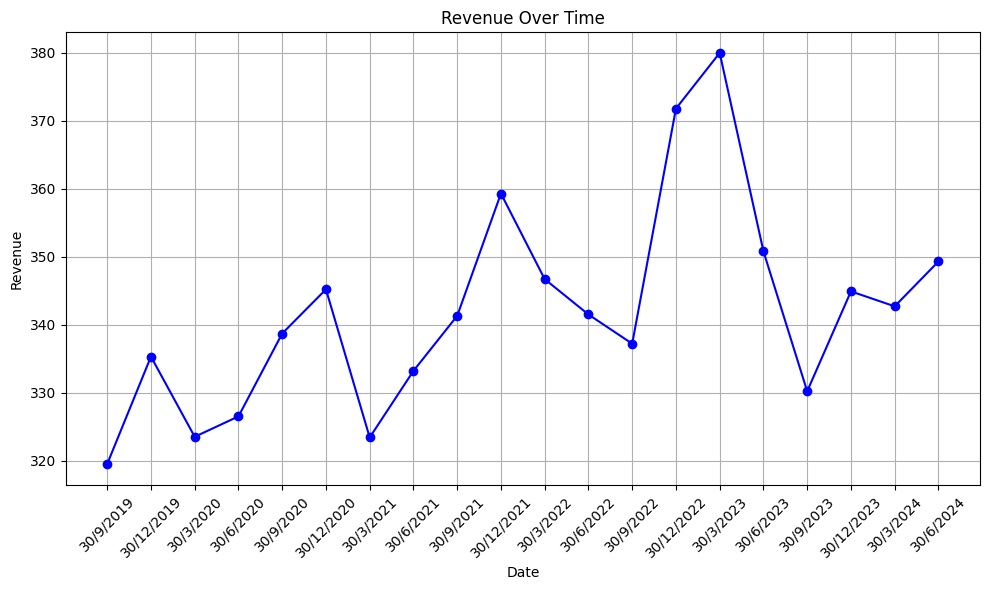

In [8]:
# Assuming maybank_rev is your DataFrame with 'date' and 'revenue' columns
plt.figure(figsize=(10, 6))
plt.plot(maybank_rev['date'], maybank_rev['revenue'], marker='o', linestyle='-', color='b')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

    lower revenue  upper revenue
20     312.464694     361.416105
21     301.562500     370.511310
22     286.545456     370.875974
23     297.551701     394.862203
24     281.181361     411.232544


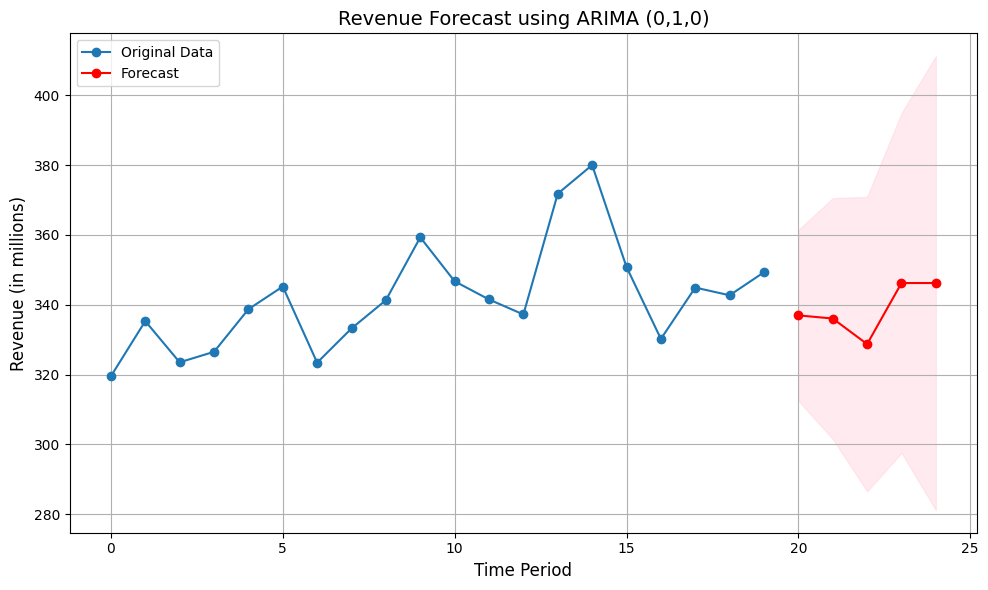

In [11]:
# Fit SARIMAX with non-seasonal ARIMA (0,1,0)
model = SARIMAX(maybank_rev['revenue'], order=(0,1,0), seasonal_order=(0,0,1,4))
model_fit = model.fit()

# Check the confidence intervals
forecast = model_fit.get_forecast(steps=5)
ci = forecast.conf_int()

# Ensure 'ci' is correctly formatted
print(ci)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(maybank_rev['revenue'], label='Original Data', marker='o')
plt.plot(range(len(maybank_rev['revenue']), len(maybank_rev['revenue']) + 5), forecast.predicted_mean, label='Forecast', color='red', marker='o')
plt.fill_between(range(len(maybank_rev['revenue']), len(maybank_rev['revenue']) + 5), ci.iloc[:, 0], ci.iloc[:, 1], color='pink', alpha=0.3)

# Add labels and title
plt.title('Revenue Forecast using ARIMA (0,1,0)', fontsize=14)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Revenue (in millions)', fontsize=12)

# Display the legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
